In [1]:
from __future__ import print_function
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd

import tensorflow as tf
import datetime
import os
from time import time

C:\Users\LDH\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Path to saved model weights(as hdf5)
resume_weights = "model/net-cnn-best.hdf5"

# Hyper-parameters
batch_size = 128
num_classes = 15
epochs = 32

# input image dimensions
img_rows, img_cols = 64, 32

In [3]:
PATH = 'tmp/x_train/balanced-raw0_10000'
temp = pd.read_csv(PATH, dtype=np.uint8, sep=',', header=None, index_col=0)


In [4]:
temp.head()

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
temp.tail()

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
temp.shape

(10000, 2048)

In [7]:
def get_file_name_sorted(path):
    fileNames = os.listdir(path)
    li = list()
    for name in fileNames:
        index = int(name.rsplit('_', 1)[1])
        li.append((index, name))

    li = sorted(li, key=lambda x: x[0])
    return [i for (_, i) in li]

def get_training_data():
    y_train_path = 'tmp/y_train/y_train_raw'
    x_train_path = 'tmp/x_train'
    
    y_train0 = pd.read_csv(y_train_path, dtype=np.uint8, sep=',', header=None, index_col=0)
    
    x_train_files = get_file_name_sorted(x_train_path)
    x_train0 = None
    for i in range(len(x_train_files)):
#     for i in range(1):
        file_path = x_train_path+'/'+x_train_files[i]
        print(file_path)
        if i == 0:
            x_train0 = pd.read_csv(file_path, dtype=np.uint8, sep=',', header=None, index_col=0)
            print(x_train0.shape)
        else:
            temp = pd.read_csv(file_path, dtype=np.uint8, sep=',', header=None, index_col=0)
            x_train0 = pd.concat([pd.DataFrame(x_train0), pd.DataFrame(temp)])
        
    return (x_train0, y_train0)

In [8]:
x_train,y_train = get_training_data()

C:\Users\LDH\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


tmp/x_train/balanced-raw0_10000
(10000, 2048)
tmp/x_train/balanced-raw10000_20000
tmp/x_train/balanced-raw20000_30000
tmp/x_train/balanced-raw30000_40000
tmp/x_train/balanced-raw40000_50000
tmp/x_train/balanced-raw50000_60000
tmp/x_train/balanced-raw60000_70000
tmp/x_train/balanced-raw70000_80000
tmp/x_train/balanced-raw80000_90000
tmp/x_train/balanced-raw90000_100000
tmp/x_train/balanced-raw100000_110000
tmp/x_train/balanced-raw110000_120000
tmp/x_train/balanced-raw120000_130000
tmp/x_train/balanced-raw130000_140000
tmp/x_train/balanced-raw140000_150000
tmp/x_train/balanced-raw150000_160000
tmp/x_train/balanced-raw160000_170000
tmp/x_train/balanced-raw170000_180000
tmp/x_train/balanced-raw180000_190000
tmp/x_train/balanced-raw190000_200000
tmp/x_train/balanced-raw200000_210000
tmp/x_train/balanced-raw210000_220000
tmp/x_train/balanced-raw220000_230000
tmp/x_train/balanced-raw230000_240000
tmp/x_train/balanced-raw240000_250000
tmp/x_train/balanced-raw250000_260000
tmp/x_train/balanced-

In [9]:
print(x_train.shape, y_train.shape)

(2038140, 2048) (2038140, 1)


In [10]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_train.tail()

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
def get_val_data():
    x_val_path = "tmp/X_val/X_val_raw"
    y_val_path = "tmp/y_val/y_val_raw"
    
    x_val = pd.read_csv(x_val_path, dtype=np.uint8, sep=',', header=None, index_col=0)
    y_val = pd.read_csv(y_val_path, dtype=np.uint8, sep=',', header=None, index_col=0)
    return (x_val, y_val)

In [13]:
x_val, y_val = get_val_data()

In [14]:
print(x_val.shape, y_val.shape)

(226460, 2048) (226460, 1)


In [15]:
x_test, y_test = x_val, y_val

In [32]:
def get_test_data():
    x_test_path = 'tmp/X_test/X_test_raw'
    y_test_path = "tmp/y_test/y_test_raw"
   
    x_test = pd.read_csv(x_test_path, dtype=np.uint8, sep=',', header=None, index_col=0)
    y_test = pd.read_csv(y_test_path, dtype=np.uint8, sep=',', header=None, index_col=0)
    
    return (x_test, y_test)

In [17]:
# MNIST handwritten image classification
# the data, shuffled and split between train and test sets

# Reshape strategy according to backend
if K.image_data_format() == 'channels_first':
    x_train = x_train.values.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.values.reshape(x_test.shape[0], 1, img_rows, img_cols)
    # 1 x 28 x 28 [number_of_channels (colors) x height x weight]
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.values.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.values.reshape(x_test.shape[0], img_rows, img_cols, 1)
    # 28 x 28 x 1 [height x weight x number_of_channels (colors)]
    input_shape = (img_rows, img_cols, 1)
    
# Reshape, type, normalized, print
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

# Dataset info
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(np.unique(y_train), np.unique(y_test))

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape, y_test.shape)

x_train shape: (2038140, 64, 32, 1)
2038140 train samples
226460 test samples
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(2038140, 15) (226460, 15)


In [18]:
print(y_train.shape)
print(y_test.shape)

(2038140, 15)
(226460, 15)


In [19]:
def buildModel():
    # MODEL
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 2), activation='relu'))
   
    model.add(Conv2D(256, (3, 2), activation='relu'))
  
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
   
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation=Activation(tf.nn.softmax)))
    # CEE, Adam
    model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(),
            metrics=['accuracy'])
    return model

In [20]:
def train(model, is_resume_weight = False, resume_weights_path=''):
    # If exists a best model, load its weights!
    if is_resume_weight:
        if os.path.isfile(resume_weights_path):
            print ("Resumed model's weights from {}".format(resume_weights))
            # load weights
            model.load_weights(resume_weights_path)
            return 


    # Checkpoint In the /output folder
    filepath = "output/net-cnn-best_callback.hdf5"
    os.makedirs('output', exist_ok=True)

    # Keep only a single checkpoint, the best over test accuracy.
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs\{}".format(str(datetime.datetime.now().strftime('%Y%m%d_%H_%M_%S'))), histogram_freq=1)

    # Train
    hist = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test), 
                callbacks=[tensorboard_callback, checkpoint])
    print(hist.history.keys())
    
    print(hist.history['acc'])
    print(hist.history['loss'])
    print(hist.history['val_loss'])
    print(hist.history['val_acc'])
    model.save_weights("output/net-cnn-best_final.hdf5", overwrite=True)

In [21]:
keras.backend.clear_session() # It is important if to create the model twice
tf.summary.FileWriterCache.clear()

model = buildModel()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 13, 128)       49280     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 12, 256)       196864    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 6, 256)        0         
__________

C:\Users\LDH\Anaconda3\lib\site-packages\keras\activations.py:197: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [22]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print(keras.__version__)
K.tensorflow_backend._get_available_gpus()

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11492347648393635105
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 9290641572
locality {
  bus_id: 1
}
incarnation: 9885025509701740664
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0"
]
2.2.2


['/gpu:0']

In [23]:
train(model)

Train on 2038140 samples, validate on 226460 samples
Epoch 1/32
2038140/2038140 [==============================] - 597s 293us/step - loss: 0.1997 - acc: 0.8979 - val_loss: 0.2150 - val_acc: 0.9368

Epoch 00001: val_acc improved from -inf to 0.93685, saving model to output/net-cnn-best_callback.hdf5
Epoch 2/32
2038140/2038140 [==============================] - 594s 292us/step - loss: 0.1789 - acc: 0.9044 - val_loss: 0.2038 - val_acc: 0.9374

Epoch 00002: val_acc improved from 0.93685 to 0.93736, saving model to output/net-cnn-best_callback.hdf5
Epoch 3/32
2038140/2038140 [==============================] - 594s 291us/step - loss: 0.1770 - acc: 0.9051 - val_loss: 0.2100 - val_acc: 0.9387

Epoch 00003: val_acc improved from 0.93736 to 0.93867, saving model to output/net-cnn-best_callback.hdf5
Epoch 4/32
2038140/2038140 [==============================] - 594s 291us/step - loss: 0.1762 - acc: 0.9054 - val_loss: 0.1987 - val_acc: 0.9382

Epoch 00004: val_acc did not improve from 0.93867
Epoch

In [24]:
# Eval
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

226460/226460 [==============================] - 32s 141us/step
Test loss: 0.2017975448858264
Test accuracy: 0.9374503223569446


In [25]:
# test to load weights
model1 = buildModel()
train(model1, True, 'output/net-cnn-best_final.hdf5')
# Eval
score = model1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Resumed model's weights from model/net-cnn-best.hdf5


C:\Users\LDH\Anaconda3\lib\site-packages\keras\activations.py:197: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


226460/226460 [==============================] - 32s 140us/step
Test loss: 0.2017975448858264
Test accuracy: 0.9374503223569446


In [26]:
# test to load weights
model1 = buildModel()
train(model1, True, 'output/net-cnn-best_callback.hdf5')

C:\Users\LDH\Anaconda3\lib\site-packages\keras\activations.py:197: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Resumed model's weights from model/net-cnn-best.hdf5


In [27]:
y_train_path = 'tmp/y_train/y_train_raw'
    
y_train0 = pd.read_csv(y_train_path, dtype=np.uint8, sep=',', header=None, index_col=0)

C:\Users\LDH\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

def k_fold_evaluate(X, y):
    acc_sum = 0.0

    skf = StratifiedKFold(n_splits=5, random_state=2)
    for fold_index, (train_index,test_index) in enumerate(skf.split(X,y)): 
        print('---------------------------------------------')
        print('Fold #{}'.format(fold_index))    
        
        X_test = X[test_index]
        Y_test = y.values[test_index]
        print(X_test.shape, Y_test.shape)
        
        # convert class vectors to binary class matrices
        Y_test = keras.utils.to_categorical(Y_test, num_classes)
        
        # Eval
        score = model1.evaluate(X_test, Y_test, verbose=1)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

        acc_sum = acc_sum + score[1]
    
    print('average acc is ', (acc_sum/5))

In [31]:
k_fold_evaluate(x_train, y_train0)

---------------------------------------------
Fold #0
(407640, 64, 32, 1) (407640, 1)
407640/407640 [==============================] - 47s 116us/step
Test loss: 0.17175926537593955
Test accuracy: 0.9073324502011579
---------------------------------------------
Fold #1
(407625, 64, 32, 1) (407625, 1)
407625/407625 [==============================] - 48s 118us/step
Test loss: 0.17350797651907346
Test accuracy: 0.9068531125421649
---------------------------------------------
Fold #2
(407625, 64, 32, 1) (407625, 1)
407625/407625 [==============================] - 47s 116us/step
Test loss: 0.1709029697328806
Test accuracy: 0.9079619748543392
---------------------------------------------
Fold #3
(407625, 64, 32, 1) (407625, 1)
407625/407625 [==============================] - 48s 117us/step
Test loss: 0.17120876776003893
Test accuracy: 0.907903097209445
---------------------------------------------
Fold #4
(407625, 64, 32, 1) (407625, 1)
407625/407625 [==============================] - 47s 115

NameError: name 'results' is not defined

In [33]:
x_test1, y_test1 = get_test_data()
x_test1 = x_test1.values.reshape((x_test1.shape[0], img_rows, img_cols, 1))

# convert class vectors to binary class matrices
y_test1 = keras.utils.to_categorical(y_test1, num_classes)

print(y_test1.shape)

# Eval
score = model1.evaluate(x_test1, y_test1, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(566149, 15)
566149/566149 [==============================] - 78s 138us/step
Test loss: 0.19959246909274006
Test accuracy: 0.9393799158879722


In [34]:
val_losses = [0.21499351039640707, 0.20379296457726426, 0.21003488516319055, 0.19874910560532696, 0.19757041901410557, 0.19745442405254884, 0.19830378313520652, 0.1990350392990648, 0.20125702470001436, 0.19755098010071762, 0.20524118047009865, 0.19642310171995675, 0.19799081388478312, 0.20260354432286512, 0.2003542710417079, 0.20856657694940653, 0.19462513527816064, 0.2031064276432892, 0.20355806871373505, 0.20015391899820753, 0.198545174967492, 0.2190671226150375, 0.2008253889392124, 0.20209025021609217, 0.19383045622351355, 0.19577646694092388, 0.21152811851232367, 0.19785404088987138, 0.1956282039223696, 0.207140393631098, 0.20252767747802217, 0.2017975451330788]

val_accs = [0.9368453590080088, 0.9373575907487136, 0.9386734964274206, 0.9382495805040788, 0.9385940121917941, 0.9381171067780344, 0.9373973328665268, 0.9378124172081325, 0.9369645853614487, 0.9386602490548162, 0.9378212487898687, 0.9337587211911759, 0.9382539962949469, 0.9374856486838897, 0.9378654066985502, 0.9378742382802865, 0.938289322621892, 0.9373531749578454, 0.9382319173406062, 0.9373752539121861, 0.9378124172081325, 0.9352071005959272, 0.9387927227808606, 0.9364302746664033, 0.936668727373283, 0.9376711119003518, 0.9382760752492876, 0.9373355117943728, 0.9377770908811873, 0.9370264064336027, 0.9381436015232433, 0.9374503223569446]

train_losses = [0.19974799721589967, 0.17894697765058334, 0.17697424766005665, 0.17621359612224616, 0.17592165720006933, 0.17557482864834448, 0.1755174358926787, 0.17548069719689463, 0.17533759591013426, 0.17526000702512268, 0.1752321166692699, 0.17520409160201855, 0.1753643948191199, 0.17532234423994517, 0.1752551801093353, 0.17523250860319206, 0.17550544775041643, 0.17538562276533295, 0.175435792499939, 0.1755421219298036, 0.17575818351194258, 0.17564397665396292, 0.17555775941073323, 0.1759315544579562, 0.1759479767487288, 0.17573193032065856, 0.1757397728287438, 0.17705802758297576, 0.17606929238282726, 0.17590345368876437, 0.1762966645188637, 0.1762071064565552]

training_accs = [0.8978681542949722, 0.9044403230365927, 0.9051090700337413, 0.905380886494666, 0.9055383830320034, 0.9058342410192333, 0.9058327690914004, 0.9058950808041768, 0.9059083281799396, 0.9061011510478486, 0.9059941907814403, 0.906046198981957, 0.9061850510729396, 0.9060054755771672, 0.9061987890913134, 0.9061801446405133, 0.906329300241299, 0.9062056580952362, 0.9062375499203954, 0.9061453089546584, 0.9060270638867913, 0.9061722943442329, 0.9061840697893554, 0.9060766188777627, 0.9059740743971925, 0.9061477621719244, 0.9061129264901636, 0.9058779082868245, 0.9059465983655919, 0.9061340241598673, 0.9059981159275919, 0.9059770182615146]

In [35]:
import matplotlib.pyplot as plt

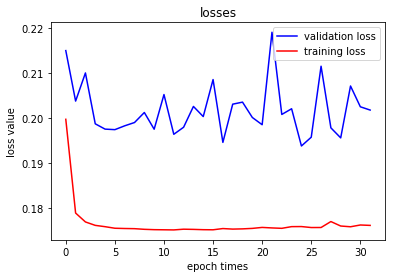

In [38]:
plt.title('losses')
steps = [i for i in range(32)]
plt.plot(steps, val_losses, color='blue', label='validation loss')
plt.plot(steps, train_losses,  color='red', label='training loss')
plt.legend() # 显示图例

plt.xlabel('epoch times')
plt.ylabel('loss value')
plt.show()

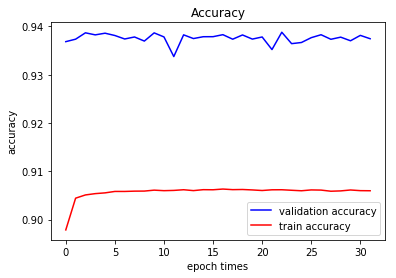

In [40]:
plt.title('Accuracy')
steps = [i for i in range(32)]
plt.plot(steps, val_accs, color='blue', label='validation accuracy')
plt.plot(steps, training_accs, color='red', label='train accuracy')
plt.legend() # 显示图例

plt.xlabel('epoch times')
plt.ylabel('accuracy')
plt.show()